In [1]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import math

# Load Data

In [2]:
sp500 = pd.read_excel('SP500_StockPrice.xlsx', header = [0, 1])

# Set Up

In [3]:
sp500

MMM                                    AOS                    \
            Adj Open  Adj High   Adj Low Adj Close Adj Open Adj High  Adj Low   
Date                                                                            
2005-01-03   57.9782   58.8461   57.8935   58.1405   5.3863   5.4475   5.2460   
2005-01-04   58.1405   58.5780   57.6254   57.6677   5.2892   5.3072   5.1435   
2005-01-05   57.6466   57.8230   56.9622   56.9622   5.1453   5.1453   4.9654   
2005-01-06   57.0680   58.1405   57.0257   57.4772   4.9942   5.0589   4.9762   
2005-01-07   57.5055   58.4227   57.3291   58.0699   5.0553   5.0571   4.9474   
2005-01-10   58.0699   59.4811   58.0699   59.2271   5.0193   5.0373   4.9474   
2005-01-11   59.2342   59.9680   59.1636   59.7704   4.9744   4.9852   4.8394   
2005-01-12   59.6787   59.9750   59.2694   59.9468   4.8394   4.8394   4.7585   
2005-01-13   59.7351   60.3278   58.9237   59.1213   4.7963   4.8376   4.7585   
2005-01-14   59.1213   59.4458   58.6344   59.2483   4.7927   4.8340   4.7531   
2005-01-18   59.2624   59.9750   57.5901   57.8724   4.7621   4.8358   4.7315   
2005-01-19   58.2110   58.4157   57.9288   57.9782   4.7675   4.8107   4.7495   
2005-01-20   58.3522   58.9519   57.9147   58.5286   4.7549   4.9240   4.7495   
2005-01-21   58.3874   58.6484   57.2797   57.3432   4.9690   5.0301   4.8988   
2005-01-24   57.5055   57.8300   57.0045   57.5901   4.9006   4.9780   4.8053   
2005-01-25   57.9641   58.5780   57.8653   58.4368   4.8502   4.9294   4.8430   
2005-01-26   58.5427   59.2059   58.5427   58.8602   4.8682   4.9150   4.8646   
2005-01-27   58.5638   58.9166   58.1687   58.4862   4.8953   4.9190   4.8735   
2005-01-28   58.4862   58.8461   58.4157   58.7402   4.8881   4.9244   4.8590   
2005-01-31   58.9872   59.6222   58.9872   59.5234   4.8935   4.9571   4.8735   
2005-02-01   59.5164   59.7633   59.1283   59.3259   4.9353   5.0970   4.9244   
2005-02-02   59.1071   59.1213   58.7120   58.8037   5.0734   5.0934   5.0516   
2005-02-03   58.8461   59.0436   58.5286   58.8037   5.0879   5.0879   5.0153   
2005-02-04   58.9519   59.4176   58.8602   59.3259   5.0879   5.1061   5.0607   
2005-02-07   59.3047   59.6222   59.1001   59.1848   5.1188   5.1970   5.0770   
2005-02-08   58.9519   59.6928   58.7544   59.5093   5.1170   5.1297   5.0334   
2005-02-09   59.5093   59.5305   58.7050   58.8108   5.0970   5.1079   4.9826   
2005-02-10   58.8390   59.3259   58.8108   59.1989   4.9935   5.0044   4.9190   
2005-02-11   59.2553   59.6363   58.7332   59.2977   4.9062   4.9789   4.8608   
2005-02-14   59.6011   59.9397   59.3753   59.6998   4.9608   4.9935   4.9335   
...              ...       ...       ...       ...      ...      ...      ...   
2018-11-09  204.0000  204.0000  199.6970  201.1000  46.5600  46.9400  45.2000   
2018-11-12  200.5700  200.7700  196.5000  197.0400  45.6900  45.9400  45.2000   
2018-11-13  197.5200  200.8800  197.1600  198.3700  45.6700  46.9000  45.5500   
2018-11-14  200.8000  201.0400  196.2900  198.0600  46.1300  46.5700  44.9400   
2018-11-15  197.7300  205.1300  196.2400  204.9100  44.8100  46.5800  44.6400   
2018-11-16  203.2400  209.7700  202.6040  209.0000  46.0200  46.4400  45.7100   
2018-11-19  207.8300  208.0500  204.3710  205.5800  45.8400  46.4000  45.5500   
2018-11-20  203.5800  204.1350  200.1900  200.5100  45.0400  46.2300  44.8700   
2018-11-21  199.6800  201.1800  198.6600  198.6900  45.7400  46.4700  45.6400   
2018-11-23  197.7600  198.6800  196.7900  196.8000  45.5100  46.0550  45.4200   
2018-11-26  198.5700  201.8300  197.3200  199.8600  46.0000  46.4600  45.8200   
2018-11-27  199.1200  201.3200  196.7790  200.6900  47.3000  47.4770  45.8500   
2018-11-28  201.9900  204.3500  199.4200  204.3400  46.3000  47.2200  45.4500   
2018-11-29  203.8700  205.8400  202.6600  204.5600  46.9800  47.1750  46.2900   
2018-11-30  204.3600  207.9200  203.9800  207.9200  46.8300  47.5900  46.5000   
2018-12-03  211.2100  211.9500  207.0500  208.76

In [4]:
subcol = ['Adj Open', 'Adj High', 'Adj Low']
#drop sub columns
sp500_sorted = sp500.drop(subcol, level = 1, axis = 1)
#drop sub colums level 1
sp500_sorted.columns = sp500_sorted.columns.droplevel(1)
sp500_sorted

,MMM,AOS,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AMD,...,WYNN,XEL,XRX,XLNX,XL,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,58.1405,5.2748,17.6798,NaN,20.4231,5.0209,26.8012,30.8392,27.6673,21.41,...,38.1389,10.3113,35.8512,21.5270,53.4915,NaN,12.9945,74.7168,56.7201,NaN
2005-01-04,57.6677,5.1561,17.5017,NaN,19.9429,4.8904,26.2580,30.0244,27.4831,20.21,...,38.0574,10.1568,35.3231,20.9166,53.6174,NaN,12.8224,74.6885,55.9458,NaN
2005-01-05,56.9622,4.9870,17.3010,NaN,19.8655,4.9621,25.0577,29.8594,27.5339,19.75,...,38.4880,10.0424,34.6259,20.2546,53.1070,NaN,12.7919,74.1050,55.7438,NaN
2005-01-06,57.4772,5.0535,17.6912,NaN,19.6873,4.8930,23.9275,29.3645,27.5085,19.72,...,40.0473,10.0252,34.4780,19.9310,53.1419,NaN,12.9362,74.9615,56.0636,NaN
2005-01-07,58.0699,5.0373,17.9942,NaN,20.6090,4.7293,25.6097,29.3845,27.3497,19.92,...,38.7149,9.9680,34.2879,20.1002,53.2048,NaN,12.8641,74.8297,54.7001,NaN
2005-01-10,59.2271,4.9762,18.1685,NaN,20.8800,4.7728,25.1891,29.4045,27.4450,20.13,...,38.8662,10.1053,34.0978,20.1370,53.1559,NaN,12.8668,75.5451,54.7338,NaN
2005-01-11,59.7704,4.8394,17.8351,NaN,20.5238,5.1027,25.1103,29.0545,27.6102,14.86,...,38.8196,10.1396,34.1611,19.7987,53.0440,NaN,12.9085,75.2251,54.7675,NaN
2005-01-12,59.9468,4.7927,17.8255,NaN,20.4386,5.0516,25.2417,29.4845,27.5085,15.02,...,38.1854,10.1282,34.2456,19.8134,53.2188,NaN,12.8058,75.0086,54.2540,NaN
2005-01-13,59.1213,4.7891,17.4837,NaN,20.2759,5.4173,24.9863,29.1045,27.4513,15.16,...,37.9702,10.2255,33.8231,19.3794,53.7013,NaN,12.6222,72.6272,53.6228,NaN


In [41]:
returns = sp500_sorted[0:2517].pct_change().mean() * 252 ###############
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = sp500_sorted[0:2517].pct_change().std() * sqrt(252) ##################
returns.dropna(inplace = True)

# K-Means

training set from 2005-01-03 to 2014-12-31

Text(0.5,1,'Elbow curve')

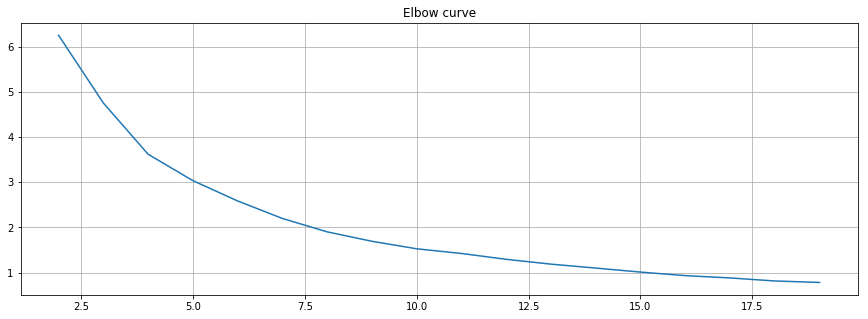

In [42]:
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
 
X = data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
 
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

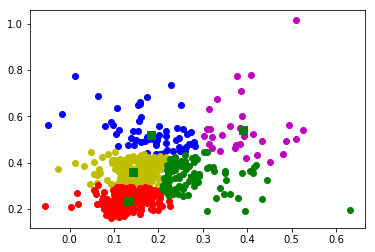

In [43]:
# computing K-Means with K = 5 (5 clusters) #################
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
 
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [44]:
km6 = KMeans(n_clusters=5) ############
km6 = km6.fit(data)
print(km6.labels_)
result = km6.labels_
result = pd.DataFrame(result, columns = ['cluster'])
result.groupby('cluster').size()

[0 4 0 4 0 1 4 1 1 3 1 1 1 1 1 0 4 4 1 1 4 2 0 0 4 0 1 1 0 0 4 0 2 0 1 3 0
 0 4 0 0 0 4 1 0 2 1 1 0 1 3 4 1 4 1 1 0 1 0 1 0 0 1 0 0 3 0 1 0 0 1 4 4 1
 0 1 1 1 0 4 0 1 0 4 1 0 3 0 4 1 1 0 2 2 4 4 0 0 4 2 1 4 3 0 4 1 0 1 1 0 0
 0 3 0 1 1 0 0 4 0 1 1 0 2 1 0 1 1 0 0 1 4 4 0 3 0 1 0 1 2 0 1 4 3 1 4 1 0
 4 0 0 0 0 0 3 3 1 1 1 0 0 0 1 0 0 4 4 1 0 4 1 1 1 0 0 0 3 1 4 4 0 4 2 1 1
 0 0 3 0 0 1 4 1 4 1 3 4 1 3 1 1 4 0 0 2 0 0 0 4 0 1 3 0 1 4 1 1 3 0 4 1 4
 0 1 0 1 0 0 0 3 1 4 3 4 0 0 0 2 2 1 0 2 0 1 1 0 0 2 4 0 1 1 1 0 0 0 1 1 4
 0 3 0 3 0 1 1 0 4 0 0 1 0 3 1 0 3 4 0 1 1 4 1 3 1 1 4 1 0 1 1 4 0 0 0 0 0
 0 3 0 3 4 0 3 0 1 1 0 0 1 2 1 3 1 1 4 4 4 1 2 1 3 1 0 0 0 0 0 0 1 1 1 1 0
 4 1 1 3 4 1 0 1 0 1 4 1 0 0 1 0 0 1 4 0 0 0 4 0 4 1 1 0 0 0 2 3 0 0 3 3 0
 1 3 4 1 1 0 4 1 0 1 4 1 2 3 0 1 1 1 0 1 4 3 1 4 4 0 1 1 4 1 0 0 1 4 2 3 1
 0 1 1 1 3 0 0 3 1 4 0 0 1 1 0 1 4 0 3 1 0 1 0 3 0 0 0 1 0 0 1 0 4 4 4 1 1
 1 1 1 2 2 4 2 1 0 2 0 1 1 4 1 0 1 1 0 0 2 1 4 1 1 0 0 0 1 0 3 1 4 1 1 1 1
 3 3 0 1 1 3 0 0 0 3 0]


cluster
0    177
1    167
2     24
3     46
4     78
dtype: int64

In [45]:
centroids = km6.cluster_centers_
centroids = pd.DataFrame(centroids, columns=['Centroid_Returns', 'Centroid_Volatility'])
centroids

,Centroid_Returns,Centroid_Volatility
0,0.136614,0.243513
1,0.156714,0.369151
2,0.397795,0.580722
3,0.161406,0.553123
4,0.303229,0.372778


In [46]:
idx,_=vq(data,centroids)
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
detail = pd.DataFrame(details, columns=['tick','cluster'])
detail
chosen_tick=[]
for i in range(0,len(detail)):
    if detail['cluster'][i]==2:##我不知道怎麼用智能的方式選出目標cluster所以只能先用人工的選QQ
        chosen_tick.append(detail['tick'][i])
len(chosen_tick)

24

In [47]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

for detail in details:
    print(detail)

('MMM', 0)
('AOS', 4)
('ABT', 0)
('ABBV', 4)
('ACN', 0)
('ATVI', 1)
('AYI', 4)
('ADBE', 1)
('AAP', 1)
('AMD', 3)
('AES', 1)
('AET', 1)
('AMG', 1)
('AFL', 1)
('A', 1)
('APD', 0)
('AKAM', 4)
('ALK', 4)
('ALB', 1)
('ARE', 1)
('ALXN', 4)
('ALGN', 2)
('ALLE', 0)
('AGN', 0)
('ADS', 4)
('LNT', 0)
('ALL', 1)
('GOOGL', 1)
('GOOG', 0)
('MO', 0)
('AMZN', 4)
('AEE', 0)
('AAL', 2)
('AEP', 0)
('AXP', 1)
('AIG', 3)
('AMT', 0)
('AWK', 0)
('AMP', 4)
('ABC', 0)
('AME', 0)
('AMGN', 0)
('APH', 4)
('APC', 1)
('ADI', 0)
('ANDV', 2)
('ANSS', 1)
('ANTM', 1)
('AON', 0)
('APA', 1)
('AIV', 3)
('AAPL', 4)
('AMAT', 1)
('APTV', 4)
('ADM', 1)
('ARNC', 1)
('AJG', 0)
('AIZ', 1)
('T', 0)
('ADSK', 1)
('ADP', 0)
('AZO', 0)
('AVB', 1)
('AVY', 0)
('BLL', 0)
('BAC', 3)
('BAX', 0)
('BBT', 1)
('BDX', 0)
('BRK.B', 0)
('BBY', 1)
('BIIB', 4)
('BLK', 4)
('HRB', 1)
('BA', 0)
('BWA', 1)
('BXP', 1)
('BSX', 1)
('BMY', 0)
('AVGO', 4)
('BF.B', 0)
('CHRW', 1)
('CA', 0)
('COG', 4)
('CDNS', 1)
('CPB', 0)
('COF', 3)
('CAH', 0)
('KMX', 4)
(

# Functions

In [48]:
def MA(df, n):
    MA = df.rolling(n).mean()
    MA.columns = df.columns
    return MA
# Bollinger Bands
def BBANDS(df, n, multiple, H_price_name='High', L_price_name='Low', C_price_name='Adj Close'):
    MA = df.rolling(n).mean()
    MSD = df.rolling(n).std()
    ub1 = MA + multiple * MSD
    uB1 = pd.DataFrame(ub1, index=df.index, columns=df.columns)
    lb1 = MA - multiple * MSD
    lB1 = pd.DataFrame(lb1, index=df.index, columns=df.columns)
    b2 = (df - MA + multiple * MSD) / (2 * multiple * MSD)
    B2 = pd.DataFrame(b2, index=df.index, columns=df.columns)
    BBAND = pd.concat([MA, uB1, lB1, B2], keys=['Mean', 'UpperBand', 'LowerBand', '%B'], axis=1)
    return BBAND
# Average True Range
def ATR(df, n, H_price_name='High', L_price_name='Low', C_price_name='Close'):
    i = 0
    TR_l = [0]
    while i < len(df.index) - 1:
        TR = max(df[H_price_name][i + 1], df[C_price_name][i]) - min(df[L_price_name][i + 1], df[C_price_name][i])
        TR_l.append(TR)
        i = i + 1
    TR_s = pd.Series(TR_l, index=df.index)
    ATR = pd.DataFrame(TR_s.ewm(span=n, min_periods=n).mean(), columns=['ATR_%s' % n])
    return ATR
# Momentum
def MOM(df, n, C_price_name='Close'):
    M = pd.Series(df[C_price_name].diff(n), name='Momentum_' + str(n))
    return M
# Keltner Channel
def KELCH(df, n, std, H_price_name='High', L_price_name='Low', C_price_name='Close'):
    KelChM = pd.Series(df[C_price_name].rolling(n).mean())
    ATR_value = ATR(df, n, H_price_name, L_price_name, C_price_name)['ATR_%s' % n]
    KelChU = KelChM + std * ATR_value
    KelChD = KelChM - std * ATR_value

    KEL = pd.concat([KelChU, KelChM, KelChD], keys=['KelChU', 'KelChM', 'KelChD'], axis=1)
    return KEL
# Keltner Channel
def SQUEEZE(df, b_n, b_std, k_n, k_std, H_price_name='High', L_price_name='Low', C_price_name='Close'):
    BBAND = BBANDS(df[[C_price_name]], b_n, b_std)
    BBAND.columns = BBAND.columns.get_level_values(0)
    UB_B = BBAND['UpperBand']
    LB_B = BBAND['LowerBand']

    KEL = KELCH(df, k_n, k_std, H_price_name, L_price_name, C_price_name)
    UB_K = KEL['KelChU']
    LB_K = KEL['KelChD']

    check = pd.concat([BBAND, KEL], axis=1)

    Signal = pd.DataFrame(((UB_B < UB_K) & (LB_B > LB_K)).astype(int), columns=['squeeze'])
    Signal['Momentum'] = MOM(df, k_n, C_price_name)

    return Signal, check
# Relative Strength Index
def RSI(df, n, H_price_name='High', L_price_name='Low'):
    i = 0
    UpI = [0]
    DoI = [0]
    while i + 1 <= len(df.index) - 1:
        UpMove = df[H_price_name][i + 1] - df[H_price_name][i]
        DoMove = df[L_price_name][i] - df[L_price_name][i + 1]
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.DataFrame(UpI, index=df.index)
    DoI = pd.DataFrame(DoI, index=df.index)
    PosDI = pd.DataFrame(UpI.ewm(span=n, min_periods=n - 1).mean())
    NegDI = pd.DataFrame(DoI.ewm(span=n, min_periods=n - 1).mean())
    RSI = 100.0 - 100.0 / (1 + (PosDI / NegDI))
    RSI.columns = ['RSI']
    return RSI
# MACD, MACD Signal and MACD difference
def MACD(df, n_fast, n_slow, C_price_name='Close'):
    EMAfast = df[C_price_name].ewm(span=n_fast, min_periods=n_slow - 1).mean()
    EMAslow = df[C_price_name].ewm(span=n_slow, min_periods=n_slow - 1).mean()
    MACD = pd.Series(EMAfast - EMAslow, name='MACD_' + str(n_fast) + '_' + str(n_slow))
    MACDsign = pd.Series(MACD.ewm(span=9, min_periods=8).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_' + str(n_fast) + '_' + str(n_slow))
    MACD = pd.concat([MACD, MACDsign, MACDdiff], axis=1)

    return MACD
def performance_matrics(port_value, output=False):
    # annual volatility
    ann_vol = (port_value.pct_change().std()) * np.sqrt(252)
    port_return = pd.DataFrame(index=port_value.index[:], columns=['Values'])
    port_return['Values'] = port_value.pct_change()

    # cumulative return series & max drawdown, max drawdown duration
    port_cum_series = pd.DataFrame(index=port_return.index[:],
                                   columns=['CumulativeReturn', 'WaterMark', 'Drawdown', 'Dwn_Duration'])

    for i in range(len(port_return)):
        if i == 0:
            port_cum_series['CumulativeReturn'].iloc[i] = 0
            port_cum_series['WaterMark'].iloc[i] = port_cum_series['CumulativeReturn'].iloc[i]
        else:
            port_cum_series['CumulativeReturn'].iloc[i] = (1 + port_return['Values'].iloc[i]) * (
                        1 + port_cum_series['CumulativeReturn'].iloc[i - 1]) - 1
            if port_cum_series['CumulativeReturn'].iloc[i] > port_cum_series['WaterMark'].iloc[i - 1]:
                port_cum_series['WaterMark'].iloc[i] = port_cum_series['CumulativeReturn'].iloc[i]
            else:
                port_cum_series['WaterMark'].iloc[i] = port_cum_series['WaterMark'].iloc[i - 1]

        port_cum_series['Drawdown'].iloc[i] = ((1 + port_cum_series['WaterMark'].iloc[i]) - (
                    1 + port_cum_series['CumulativeReturn'].iloc[i])) / (1 + port_cum_series['WaterMark'].iloc[i])
        if i == 0:
            port_cum_series['Dwn_Duration'].iloc[i] = 0
        else:
            if port_cum_series['Drawdown'].iloc[i] != 0:
                port_cum_series['Dwn_Duration'].iloc[i] = port_cum_series['Dwn_Duration'].iloc[i - 1] + 1
            else:
                port_cum_series['Dwn_Duration'].iloc[i] = 0

    max_drawdown = port_cum_series['Drawdown'].max()
    max_dwn_duration = port_cum_series['Dwn_Duration'].max()
    total_return = port_value.iloc[-1] / port_value.iloc[0] - 1

    # annual return
    ann_return = (1 + total_return) ** (1 / float((len(port_value)) / 252.0)) - 1

    # sharpe ratio
    sharpe_ratio = (ann_return) / ann_vol

    print('annual volatility:{}'.format(ann_vol.iloc[0]))
    print('annual return:{}'.format(ann_return.iloc[0]))
    print('sharpe ratio:{}'.format(sharpe_ratio.iloc[0]))
    print('max drawdown:{}'.format(max_drawdown))
    print('max down duration:{} days'.format(max_dwn_duration))
def record_transaction(symbol, action_side, date, price, quantity, fee, transaction_history):
    '''
    action_side: long or close
    date: date for executing the action
    quantity: position size
    fee: one trip cost
    transaction_history: record all the transaction here
    '''

    info = {
        'Date': date,
        'Action': action_side,
        'Price': price,
        'Quantity': quantity,
        'Fee': fee
    }
    if symbol in transaction_history:
        transaction_history[symbol].append(info)
    else:
        transaction_history.update({symbol: [info]})

    return transaction_history
def record_holdings(symbol, starting_point, price, shares_change, fee, holdings, target=np.nan):
    '''
    starting_point: date for executing the action
    quantity: +/- position size
    fee: one trip cost
    holdings: record all the stock holdings info
    target: default is "nan", or you can specify the price level you prefer
    '''
    if symbol in holdings:

        if math.isnan(target):
            target = holdings[symbol]['Target']

        info = {
            'Index': starting_point,
            'Price': price,
            'Quantity': holdings[symbol]['Quantity'] + shares_change,
            'Fee': fee,
            'Target': target
        }
        if info['Quantity'] == 0:
            del holdings[symbol]
        else:
            holdings[symbol].update(info)
    else:
        info = {
            'Index': starting_point,
            'Price': price,
            'Quantity': shares_change,
            'Fee': fee,
            'Target': target
        }
        holdings.update({symbol: info})

    return holdings

# Settings

In [49]:
#strategy parameters
int_capital = 1000000
pos_num = 10
capital_per_trade_pct = 1. / pos_num
bband_mean = 10
bband_stdev = 1.5
b_threshold = -.2
profit_target = 0.15
holding_target = 10 #days

In [50]:
sp500[2518:]

MMM                                    AOS                    \
            Adj Open  Adj High   Adj Low Adj Close Adj Open Adj High  Adj Low   
Date                                                                            
2015-01-05  148.2259  148.8079  145.5706  145.8252  26.4625  26.6926  26.1126   
2015-01-06  146.2435  146.7436  143.4463  144.2702  26.4242  26.4242  25.9256   
2015-01-07  145.4069  145.7525  144.5339  145.3160  26.3043  26.5344  26.1461   
2015-01-08  146.0889  148.8534  145.9707  148.7988  26.6207  27.0809  26.5153   
2015-01-09  148.9989  149.1353  146.6528  146.9710  27.1097  27.1097  26.5872   
2015-01-12  147.6712  147.6712  145.5161  146.1708  26.6543  26.8556  26.3283   
2015-01-13  147.5257  149.4845  144.9977  146.0617  26.9132  27.5172  26.2420   
2015-01-14  144.6249  145.9798  144.1338  145.3524  26.2804  26.6974  26.2204   
2015-01-15  146.3072  146.8073  144.9227  145.1887  26.6639  26.8604  25.9688   
2015-01-16  145.3706  147.4803  144.6703  147.3166  25.9592  26.2324  25.6428   
2015-01-20  147.9713  148.5897  145.5524  147.2620  26.4002  26.4434  25.8561   
2015-01-21  147.0074  148.5624  146.4254  147.8076  26.0934  26.3043  26.0119   
2015-01-22  148.4624  150.9449  147.4348  150.8540  26.3906  26.8221  26.1413   
2015-01-23  150.7267  150.9358  149.0535  149.1535  26.6687  26.8365  26.5440   
2015-01-26  148.7898  149.3899  147.1348  149.3536  26.6878  26.8616  26.4050   
2015-01-27  147.5985  150.1720  146.3527  148.7988  26.7981  28.8451  26.6830   
2015-01-28  149.6900  151.4724  148.9171  149.0807  28.5239  28.8788  28.1740   
2015-01-29  149.1990  151.0995  148.1168  151.0723  28.5239  28.7876  27.9726   
2015-01-30  149.8173  150.2447  147.5894  147.5894  28.3178  28.7157  28.2411   
2015-02-02  147.4257  149.6991  146.3072  149.5172  28.4999  28.7492  28.3034   
2015-02-03  150.1993  151.1268  149.7810  150.8995  29.0129  29.3101  28.8211   
2015-02-04  150.7540  150.7994  149.3536  149.8719  29.1608  29.7283  29.0262   
2015-02-05  150.3266  151.4906  149.8173  151.4542  29.4349  29.6802  29.3676   
2015-02-06  151.1632  152.4818  150.5539  151.0177  29.4734  29.7138  29.3580   
2015-02-09  149.4809  150.5357  148.9898  149.8992  29.5070  29.7956  29.3844   
2015-02-10  150.4084  151.0813  149.6809  150.7903  29.6417  29.8966  29.3868   
2015-02-11  150.5405  150.9523  149.5797  150.5039  29.8966  30.0024  29.6609   
2015-02-12  150.9157  151.8490  150.8425  151.8124  30.0072  30.3101  29.9447   
2015-02-13  151.8032  152.4621  151.2817  151.8398  30.2188  30.3823  29.9927   
2015-02-17  151.8398  152.7366  151.0621  152.7366  30.0408  30.1755  29.7667   
...              ...       ...       ...       ...      ...      ...      ...   
2018-11-09  204.0000  204.0000  199.6970  201.1000  46.5600  46.9400  45.2000   
2018-11-12  200.5700  200.7700  196.5000  197.0400  45.6900  45.9400  45.2000   
2018-11-13  197.5200  200.8800  197.1600  198.3700  45.6700  46.9000  45.5500   
2018-11-14  200.8000  201.0400  196.2900  198.0600  46.1300  46.5700  44.9400   
2018-11-15  197.7300  205.1300  196.2400  204.9100  44.8100  46.5800  44.6400   
2018-11-16  203.2400  209.7700  202.6040  209.0000  46.0200  46.4400  45.7100   
2018-11-19  207.8300  208.0500  204.3710  205.5800  45.8400  46.4000  45.5500   
2018-11-20  203.5800  204.1350  200.1900  200.5100  45.0400  46.2300  44.8700   
2018-11-21  199.6800  201.1800  198.6600  198.6900  45.7400  46.4700  45.6400   
2018-11-23  197.7600  198.6800  196.7900  196.8000  45.5100  46.0550  45.4200   
2018-11-26  198.5700  201.8300  197.3200  199.8600  46.0000  46.4600  45.8200   
2018-11-27  199.1200  201.3200  196.7790  200.6900  47.3000  47.4770  45.8500   
2018-11-28  201.9900  204.3500  199.4200  204.3400  46.3000  47.2200  45.4500   
2018-11-29  203.8700  205.8400  202.6600  204.5600  46.9800  47.1750  46.2900   
2018-11-30  204.3600  207.9200  203.9800  207.9200  46.8300  47.5900  46.5000   
2018-12-03  211.2100  211.9500  207.0500  208.76

In [51]:
Mat_col = []
for i in range(505):
    Mat_col.append(list(sp500)[i*4][0])
PriceMat = sp500[2518:] ###################
#股票名字不在chosen裡面的話 刪掉
for symbol in Mat_col:
    if symbol not in chosen_tick:
        PriceMat.drop(symbol,axis = 1,inplace=True)

#要跑挑過的就把所有Mat_col換成chosen_tick
newPriceMat = pd.DataFrame(data=np.zeros((len(PriceMat), len(chosen_tick))), index=pd.to_datetime(PriceMat.index[:]), columns = chosen_tick)
for symbol in chosen_tick:
    newPriceMat[symbol] = PriceMat[symbol]['Adj Close']

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# K-Means Chosen Set Main( ) for Strategy

testing set from 2015-01 to 2018-12-24

In [52]:
SignalMat = BBANDS(newPriceMat, bband_mean, bband_stdev)
SquSingal = pd.DataFrame(data=np.zeros((len(PriceMat), len(chosen_tick))), index=pd.to_datetime(PriceMat.index[:]), columns = chosen_tick)
MoSingal = pd.DataFrame(data=np.zeros((len(PriceMat), len(chosen_tick))), index=pd.to_datetime(PriceMat.index[:]), columns = chosen_tick)
for symbol in chosen_tick:
    SquSingal[symbol] = SQUEEZE(PriceMat[symbol], 20, 2, 20, 2, 'Adj High', 'Adj Low', 'Adj Close')[0]['squeeze']
    MoSingal[symbol] = SQUEEZE(PriceMat[symbol], 20, 2, 20, 2, 'Adj High', 'Adj Low', 'Adj Close')[0]['Momentum']

cash_value = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])
pos_value = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])
total_port_value = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])

# record transactions
holding_stocks = {}
transaction_history = {}

#Main strategy
for i in range(0, len(PriceMat)):
    if i == 0:
        cash_value.iloc[i, 0] = int_capital
        total_port_value.iloc[i, 0] = cash_value.iloc[i, 0]
    else:
        cash_value.iloc[i, 0] = cash_value.iloc[i - 1, 0]
        # do the mark to market
        for symbol in holding_stocks.keys():
            today_price = newPriceMat[symbol].iloc[i]
            shares = holding_stocks[symbol]['Quantity']
            pos_value.iloc[i, 0] += shares * today_price

        # check if postion needs to exit
        if len(holding_stocks.keys()) != 0:
            for symbol in list(holding_stocks):
                prior_day_price = newPriceMat[symbol].iloc[i - 1]
                prior_day_signal = SignalMat['Mean'][symbol].iloc[i - 1]
                today_price = newPriceMat[symbol].iloc[i]
                date = newPriceMat[symbol].index[i]
                shares = holding_stocks[symbol]['Quantity']
                # if meet criteria => exit position
                if prior_day_price >= prior_day_signal:
                    cash_value.iloc[i, 0] = cash_value.iloc[i, 0] + shares * today_price
                    pos_value.iloc[i, 0] -= shares * today_price
                    holding_stocks = record_holdings(symbol, 0, today_price, -shares, 0, holding_stocks)
                    transaction_history = record_transaction(symbol, 'close', date, today_price, shares, 0,
                                                             transaction_history)

        total_port_value.iloc[i, 0] = pos_value.iloc[i, 0] + cash_value.iloc[i, 0]

        # Add more positions
        if len(holding_stocks.keys()) < pos_num:
            for symbol in newPriceMat.columns:
                if symbol not in holding_stocks.keys():
                    # check if signal meets
                    prior_day_price = newPriceMat[symbol].iloc[i - 1]
                    cash_allocate = capital_per_trade_pct * total_port_value.iloc[i, 0]
                    today_price = newPriceMat[symbol].iloc[i]
                    date = newPriceMat[symbol].index[i]
                    holding_cash = cash_value.iloc[i, 0]
                    high = newPriceMat[symbol].rolling(52).max().iloc[i]
                    squee = SquSingal[symbol].iloc[i]
                    Mo = MoSingal[symbol].iloc[i]
                    if math.isnan(prior_day_price) == False and math.isnan(Mo) == False and math.isnan(high) == False and cash_allocate <= holding_cash:
                        if squee == 1 and abs(today_price - high) < high*0.05 and Mo > 0:
                            shares = cash_allocate / today_price
                            cash_value.iloc[i, 0] = holding_cash - cash_allocate
                            pos_value.iloc[i, 0] += cash_allocate
                            holding_stocks = record_holdings(symbol, i, today_price, shares, 0, holding_stocks)
                            transaction_history = record_transaction(symbol, 'long', date, today_price, shares, 0, transaction_history)
                else:
                    continue

    # update total value of portfolio
    total_port_value.iloc[i, 0] = pos_value.iloc[i, 0] + cash_value.iloc[i, 0]

# S&P 500 Main( ) for Strategy 

In [53]:
sp500 = pd.read_excel('SP500_StockPrice.xlsx', header = [0, 1])
sp500.fillna(method = 'ffill', inplace = True)
PriceMat = sp500[2518:] ####################

#要跑挑過的就把所有Mat_col換成chosen_tick
newPriceMat = pd.DataFrame(data=np.zeros((len(PriceMat), len(Mat_col))), index=pd.to_datetime(PriceMat.index[:]), columns = Mat_col)
for symbol in Mat_col:
    newPriceMat[symbol] = PriceMat[symbol]['Adj Close']

SignalMat = BBANDS(newPriceMat, bband_mean, bband_stdev)
SquSingal = pd.DataFrame(data=np.zeros((len(PriceMat), len(Mat_col))), index=pd.to_datetime(PriceMat.index[:]), columns = Mat_col)
MoSingal = pd.DataFrame(data=np.zeros((len(PriceMat), len(Mat_col))), index=pd.to_datetime(PriceMat.index[:]), columns = Mat_col)
for symbol in Mat_col:
    SquSingal[symbol] = SQUEEZE(PriceMat[symbol], 20, 2, 20, 2, 'Adj High', 'Adj Low', 'Adj Close')[0]['squeeze']
    MoSingal[symbol] = SQUEEZE(PriceMat[symbol], 20, 2, 20, 2, 'Adj High', 'Adj Low', 'Adj Close')[0]['Momentum']

cash_value = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])
pos_value = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])
total_port_value2 = pd.DataFrame(data=np.zeros((len(PriceMat), 1)), index=PriceMat.index[:], columns=['Values'])

# record transactions
holding_stocks = {}
transaction_history = {}

#Main strategy
for i in range(0, len(PriceMat)):
    if i == 0:
        cash_value.iloc[i, 0] = int_capital
        total_port_value2.iloc[i, 0] = cash_value.iloc[i, 0]
    else:
        cash_value.iloc[i, 0] = cash_value.iloc[i - 1, 0]
        # do the mark to market
        for symbol in holding_stocks.keys():
            today_price = newPriceMat[symbol].iloc[i]
            shares = holding_stocks[symbol]['Quantity']
            pos_value.iloc[i, 0] += shares * today_price

        # check if postion needs to exit
        if len(holding_stocks.keys()) != 0:
            for symbol in list(holding_stocks):
                prior_day_price = newPriceMat[symbol].iloc[i - 1]
                prior_day_signal = SignalMat['Mean'][symbol].iloc[i - 1]
                today_price = newPriceMat[symbol].iloc[i]
                date = newPriceMat[symbol].index[i]
                shares = holding_stocks[symbol]['Quantity']
                # if meet criteria => exit position
                if prior_day_price >= prior_day_signal:
                    cash_value.iloc[i, 0] = cash_value.iloc[i, 0] + shares * today_price
                    pos_value.iloc[i, 0] -= shares * today_price
                    holding_stocks = record_holdings(symbol, 0, today_price, -shares, 0, holding_stocks)
                    transaction_history2 = record_transaction(symbol, 'close', date, today_price, shares, 0,
                                                             transaction_history)

        total_port_value2.iloc[i, 0] = pos_value.iloc[i, 0] + cash_value.iloc[i, 0]

        # Add more positions
        if len(holding_stocks.keys()) < pos_num:
            for symbol in newPriceMat.columns:
                if symbol not in holding_stocks.keys():
                    # check if signal meets
                    prior_day_price = newPriceMat[symbol].iloc[i - 1]
                    cash_allocate = capital_per_trade_pct * total_port_value2.iloc[i, 0]
                    today_price = newPriceMat[symbol].iloc[i]
                    date = newPriceMat[symbol].index[i]
                    holding_cash = cash_value.iloc[i, 0]
                    high = newPriceMat[symbol].rolling(52).max().iloc[i]
                    squee = SquSingal[symbol].iloc[i]
                    Mo = MoSingal[symbol].iloc[i]
                    if math.isnan(prior_day_price) == False and math.isnan(Mo) == False and math.isnan(high) == False and cash_allocate <= holding_cash:
                        if squee == 1 and abs(today_price - high) < high*0.05 and Mo > 0:
                            shares = cash_allocate / today_price
                            cash_value.iloc[i, 0] = holding_cash - cash_allocate
                            pos_value.iloc[i, 0] += cash_allocate
                            holding_stocks = record_holdings(symbol, i, today_price, shares, 0, holding_stocks)
                            transaction_history = record_transaction(symbol, 'long', date, today_price, shares, 0,
                                                                     transaction_history)
                else:
                    continue

    # update total value of portfolio
    total_port_value2.iloc[i, 0] = pos_value.iloc[i, 0] + cash_value.iloc[i, 0]

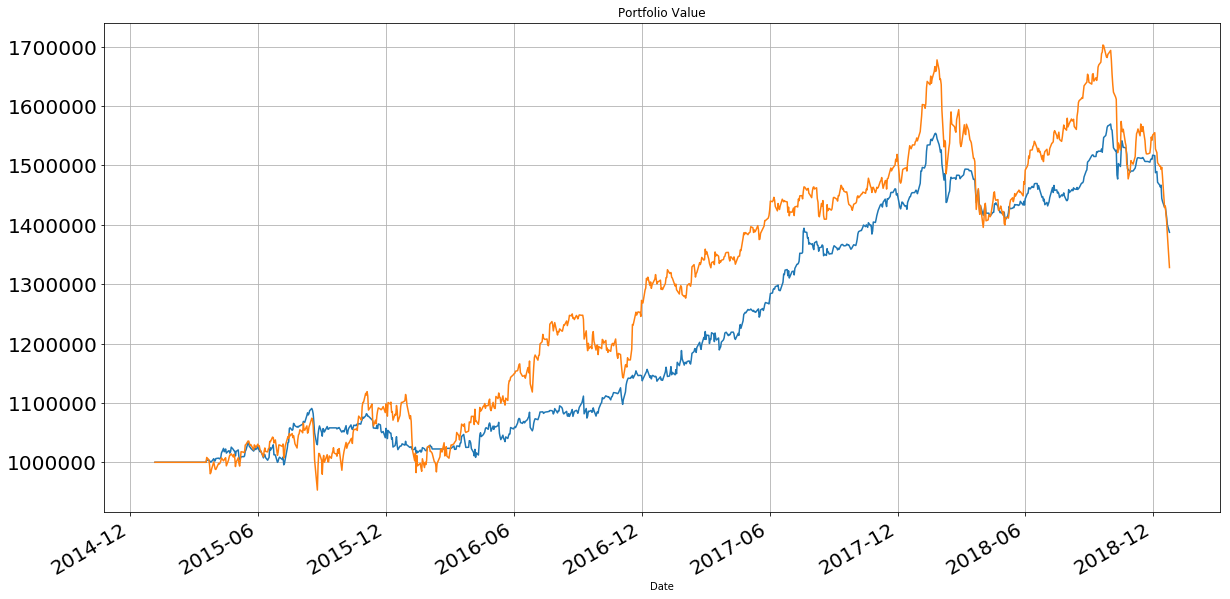

In [56]:
total_port_value.iloc[:, 0].plot(figsize=(20, 10), title='Portfolio Value', fontsize=20, grid=True)
total_port_value2.iloc[:, 0].plot(figsize=(20, 10), title='Portfolio Value', fontsize=20, grid=True)

In [57]:
performance_matrics(total_port_value)##chosen_tick

annual volatility:0.08829145615716066
annual return:0.08583341358182506
sharpe ratio:0.9721599044537192
max drawdown:0.11618976272008308
max down duration:244 days


In [58]:
performance_matrics(total_port_value2)##沒挑過

annual volatility:0.14324647310209024
annual return:0.07396519776489763
sharpe ratio:0.5163491719072443
max drawdown:0.22011373672854953
max down duration:161 days
